In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import MCMC_diag as d

# specific functions
import HMC as h
from k_energies import *

In [2]:
class CubicWell:
    """First order phase transition"""
    def __init__(self, a, b, C, t):
        self.a = a
        self.b = b
        self.C = C
        self.t = t
        
    def value(self, x):
        a = self.a
        b = self.b
        C = self.C
        t = self.t
        return a*t*x**2 + b*x**4/4 + C*x**3
    
    def grad(self, x):
        a = self.a
        b = self.b
        C = self.C
        t = self.t
        return 2*a*t*x + b*x**3 + 3*C*x^2

-7500
702



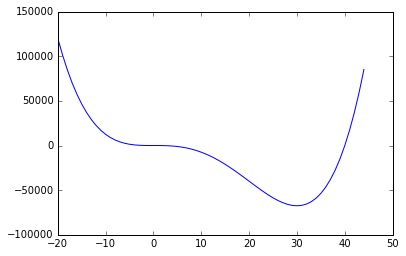

In [3]:
a = 1
b = 1
C = -10
t = 0
U = CubicWell(a,b,C,t)
x = 10
print U.value(x)
print U.grad(x)

x = range(-20,45)
print
store = np.empty(len(x))
for i in xrange(len(x)):
    store[i] = U.value(x[i])
plt.plot(x, store);

Acceptance rate: 0.682800
LF Steps: 10, Step-size: 0.18.
Acceptance rate: 0.634100
LF Steps: 10, Step-size: 0.50.


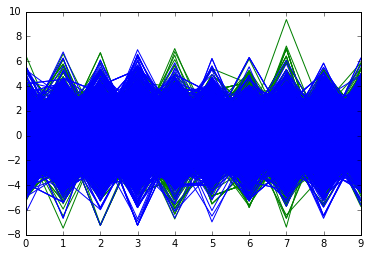

6730.14804845
11087.5831486


In [27]:
# Simple heavy-tailed examples
x = np.ones(10)
b = 1.2
a = 1 + 1/(b-1)

L = 10
nits = 10000

U = PE_family(b)
K_opt = PE_family(a)
K_gauss = Gauss()
samples_opt = h.HMC(nits, x, U, K_opt, L, e = 0.18)
samples_gauss = h.HMC(nits, x, U, K_gauss, L, e = 0.5)

x_opt = samples_opt['x']
x_gauss = samples_gauss['x']

plt.plot(x_opt, 'g-')
plt.plot(x_gauss, 'b-')
plt.show()

print d.ess(x_opt[0])
print d.ess(x_gauss[0])